In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("/Titanic-Dataset.csv")

In [6]:
print(df.shape)

(891, 12)


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


In [9]:
df['Age'] = df['Age'].fillna(method='ffill')
df['Age'] = df['Age'].fillna(method='bfill')

/tmp/ipython-input-9-641571526.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='ffill')
/tmp/ipython-input-9-641571526.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='bfill')


In [13]:
df['Cabin'] = df['Cabin'].fillna('unknown')
top5_cabins = df['Cabin'].value_counts().nlargest(5).index
df['Cabin_limited'] = df['Cabin'].apply(lambda x: x if x in top5_cabins else 'other')

In [14]:
df = df.drop_duplicates()

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

In [17]:
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

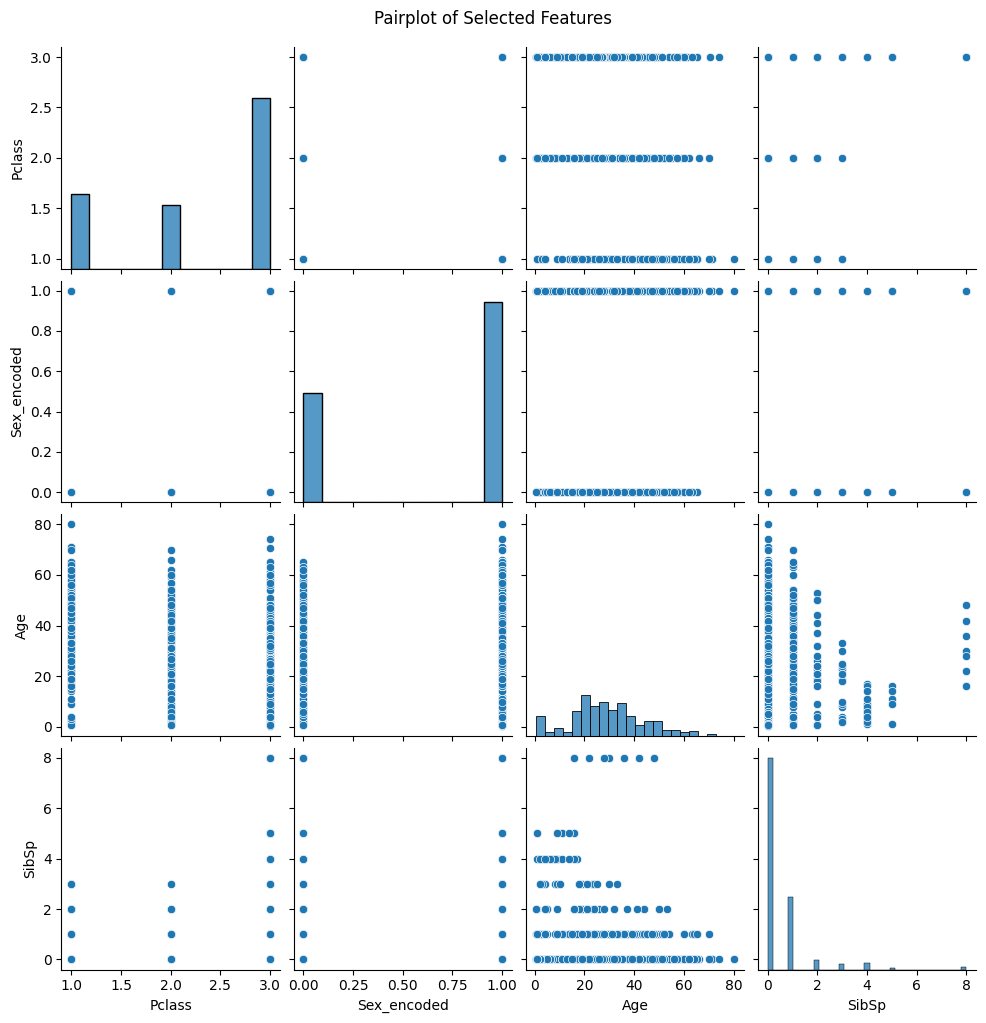

In [19]:
sns.pairplot(df[['Pclass', 'Sex_encoded', 'Age', 'SibSp']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

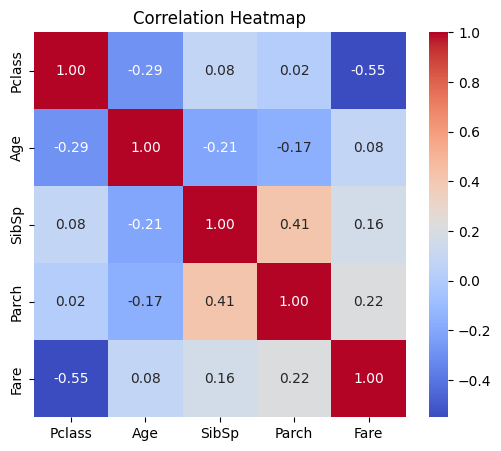

In [20]:
corr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()